# Healt Care Analytics
## by Heba Ayman

## Preliminary Wrangling

> Recent Covid-19 Pandemic has raised alarms over one of the most overlooked area to focus: Healthcare Management. While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# !cp /content/drive/'My Drive'/train.csv .

In [3]:
df = pd.read_csv('/content/train.csv')

In [4]:
df.head().T

,0,1,2,3,4
case_id,1,2,3,4,5
Hospital_code,8,2,10,26,26
Hospital_type_code,c,c,e,b,b
City_Code_Hospital,3,5,1,2,2
Hospital_region_code,Z,Z,X,Y,Y
Available Extra Rooms in Hospital,3,2,2,2,2
Department,radiotherapy,radiotherapy,anesthesia,radiotherapy,radiotherapy
Ward_Type,R,S,S,R,S
Ward_Facility_Code,F,F,E,D,D
Bed Grade,2,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [6]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313793 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            313793 non-null  int64  
 1   Hospital_code                      313793 non-null  int64  
 2   Hospital_type_code                 313793 non-null  object 
 3   City_Code_Hospital                 313793 non-null  int64  
 4   Hospital_region_code               313793 non-null  object 
 5   Available Extra Rooms in Hospital  313793 non-null  int64  
 6   Department                         313793 non-null  object 
 7   Ward_Type                          313793 non-null  object 
 8   Ward_Facility_Code                 313793 non-null  object 
 9   Bed Grade                          313793 non-null  float64
 10  patientid                          313793 non-null  int64  
 11  City_Code_Patient                  3137

In [7]:
df.rename(columns = {'Available Extra Rooms in Hospital':'Available_Extra_Rooms_in_Hospital','Bed Grade':'Bed_Grade','Type of Admission':'Type_of_Admission','Severity of Illness':'Severity_of_Illness',
                   'Visitors with Patient':'Visitors_with_Patient'}, inplace = True) 

In [8]:
def make_orderd_cat(col,order):
  ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = order)
  df[col] = df[col].astype( ordered_cat)


In [9]:
make_orderd_cat('Stay',['0-10', '11-20', '21-30', '31-40','41-50','51-60','61-70','71-80','81-90','91-100','More than 100 Days'])
make_orderd_cat('Age',['0-10', '11-20', '21-30', '31-40','41-50','51-60','61-70','71-80','81-90','91-100'])
make_orderd_cat('Severity_of_Illness',['Minor', 'Moderate', 'Extreme'])

In [10]:
df['Stay_num'] = df.Stay.map({'0-10':5, '11-20':15, '21-30':25, '31-40':35,'41-50':45,'51-60':55,'61-70':65,'71-80':75,'81-90':85,'91-100':95,'More than 100 Days':105})
df['Age_num'] = df.Age.map({'0-10':5, '11-20':15, '21-30':25, '31-40':35,'41-50':45,'51-60':55,'61-70':65,'71-80':75,'81-90':85,'91-100':95})
df['Stay_num']=pd.to_numeric(df['Stay_num'] )
df['Age_num']=pd.to_numeric(df['Age_num'] )

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313793 entries, 0 to 318437
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   case_id                            313793 non-null  int64   
 1   Hospital_code                      313793 non-null  int64   
 2   Hospital_type_code                 313793 non-null  object  
 3   City_Code_Hospital                 313793 non-null  int64   
 4   Hospital_region_code               313793 non-null  object  
 5   Available_Extra_Rooms_in_Hospital  313793 non-null  int64   
 6   Department                         313793 non-null  object  
 7   Ward_Type                          313793 non-null  object  
 8   Ward_Facility_Code                 313793 non-null  object  
 9   Bed_Grade                          313793 non-null  float64 
 10  patientid                          313793 non-null  int64   
 11  City_Code_Patient         

### What is the structure of your dataset?

> most of the columns are categorical variables(the age and stay are divided into categories) 
some categories are ordinal.

### What is/are the main feature(s) of interest in your dataset?

> Descover what affect the duration of the stay of the patient.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Department, Ward_type, Type of Admission, Severity of Illness, Age

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [12]:
base_color = sb.color_palette()[0]

In [13]:
def plot(order_by_count=False):
  cat_order = None
  plt.figure(figsize=(8,60))
  plt.subplots_adjust(wspace=0.6, hspace=0.6)

  for i in range(len(df.dtypes)):
    if str(df.dtypes[i]) in ['object','category']:
      plt.subplot(20,1,i+1)
      if (order_by_count):
        cat_order = df[df.dtypes.index[i]].value_counts().index
      sb.countplot(data = df, x = df.dtypes.index[i],color=base_color,order=cat_order)
      plt.xticks(rotation = 45)
    else:
      plt.subplot(20,1,i+1)
      plt.hist(data = df, x = df.dtypes.index[i])
      plt.title(df.dtypes.index[i])
    


Here i plot the numerical variables as histograms and non numerical as bar plot to give a guick over view

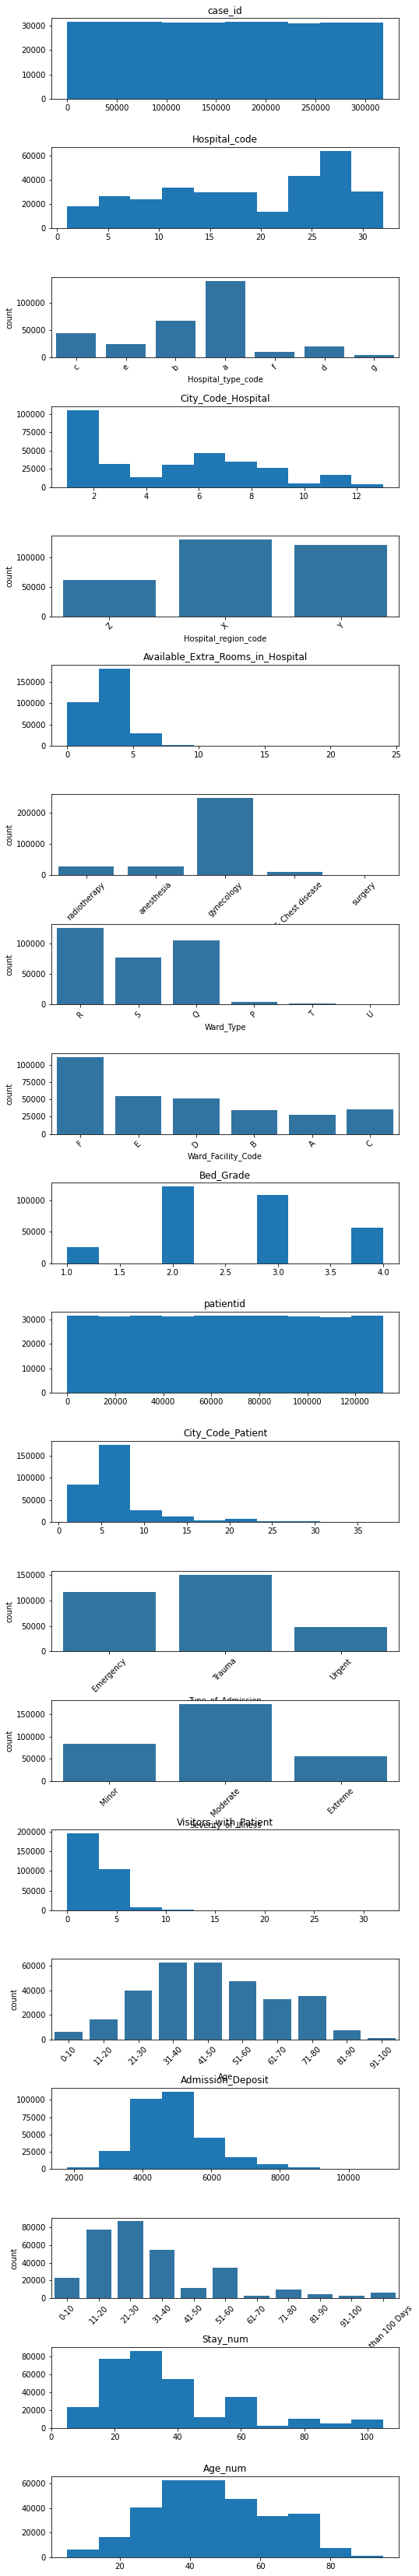

In [14]:
plot()

Here i make the order of the non numerical variable in the bar plot be by the count

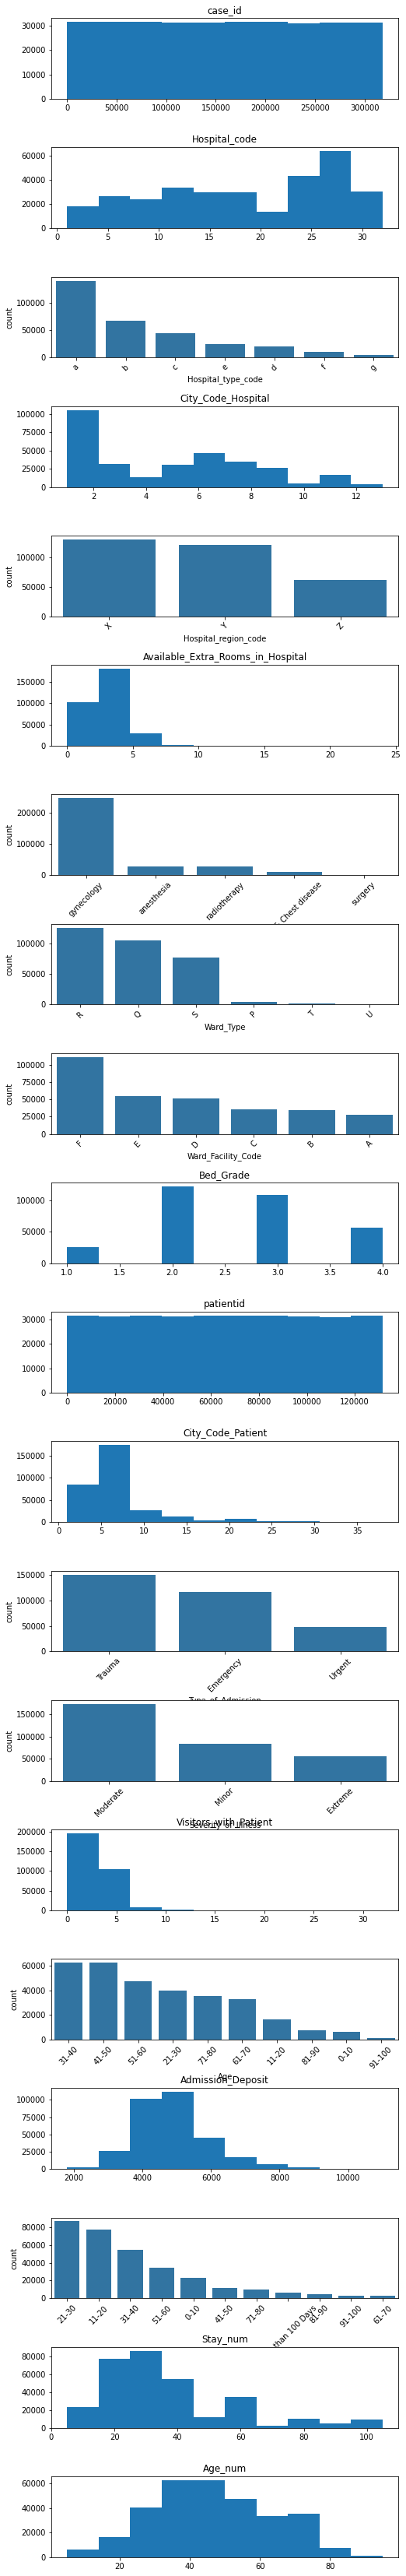

In [15]:
plot(order_by_count=True)

Now i will focus on some plots and plot them again with comments

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

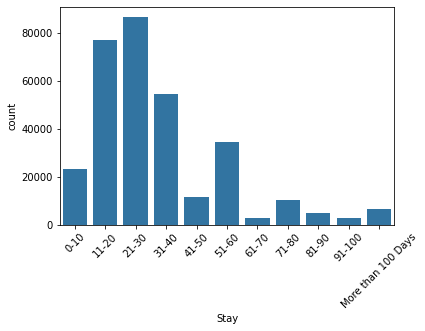

In [16]:
sb.countplot(data = df, x ='Stay',color=base_color)
plt.xticks(rotation = 45)

Stay have 2 peaks at 21-30 and 51-60 days,
most of the cases stay between 11 to 40 days

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

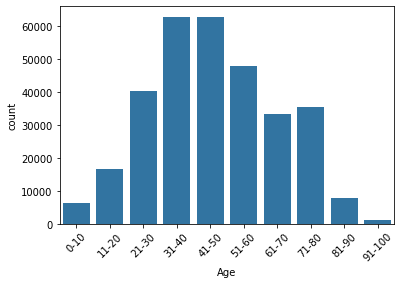

In [17]:
sb.countplot(data = df, x = 'Age',color=base_color)
plt.xticks(rotation = 45)

The age follow normal destribution with mean around 42 years.

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

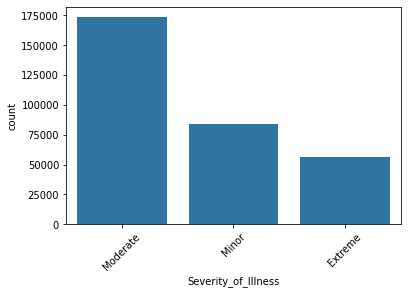

In [18]:
cat_order = df.Severity_of_Illness.value_counts().index
sb.countplot(data = df, x = df.Severity_of_Illness,color=base_color,order=cat_order)
plt.xticks(rotation = 45)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

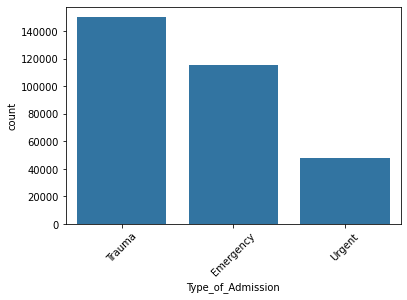

In [19]:
cat_order = df.Type_of_Admission.value_counts().index
sb.countplot(data = df, x = df.Type_of_Admission,color=base_color,order=cat_order)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

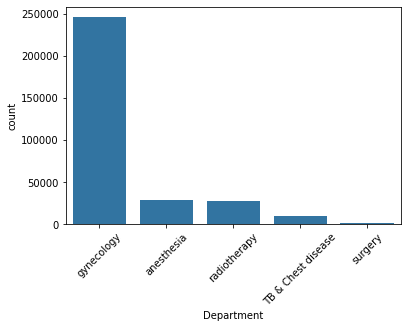

In [20]:
cat_order = df.Department.value_counts().index
sb.countplot(data = df, x = df.Department,color=base_color,order=cat_order)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

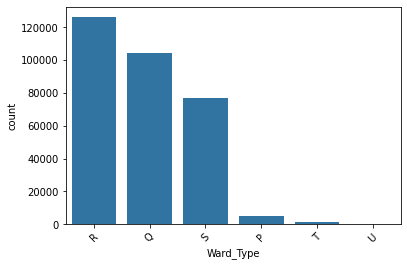

In [21]:
cat_order = df.Ward_Type.value_counts().index
sb.countplot(data = df, x = df.Ward_Type,color=base_color,order=cat_order)
plt.xticks(rotation = 45)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

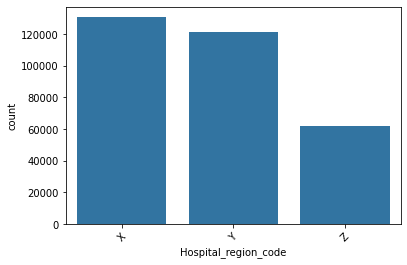

In [22]:
cat_order = df.Hospital_region_code.value_counts().index
sb.countplot(data = df, x = df.Hospital_region_code,color=base_color,order=cat_order)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

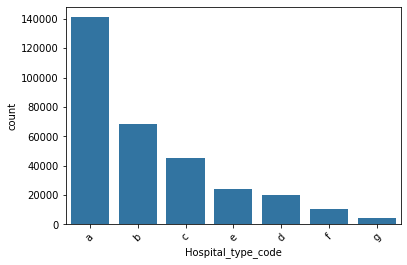

In [23]:
cat_order = df.Hospital_type_code.value_counts().index
sb.countplot(data = df, x = df.Hospital_type_code,color=base_color,order=cat_order)
plt.xticks(rotation = 45)

The above figures show most occured values

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 

*   most of the variable are categorical so i plot them as bar plot and order the categories from most occued to less
*   also i transformed the age and the days ranges to integers to be able to take their average
*   while plotting the age as bar chart it locks like normaly distributed
*   the stay column looks like multimodal distribution
*   i plotted the other columns of interest as bar plot to see the number of occurrence for each category of them



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> 

*   there were ordinanal categorical variables so i made their type as ordered category, also transformed some to numbers.
*   there was no unusal distributions for me.



## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [24]:
df2 = df[['Stay','Age','Stay_num','Age_num','Hospital_type_code','Hospital_region_code','Ward_Type','Department','Type_of_Admission','Severity_of_Illness']]

Trying to find relation between Age and Stay

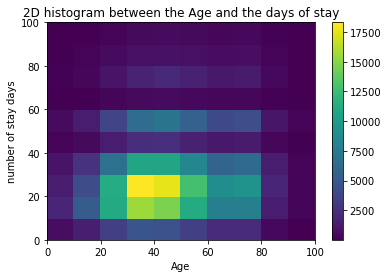

In [71]:
bins_x = np.arange(0, 110, 10)
bins_y = np.arange(0, 110, 10)
plt.hist2d(data = df2, x = 'Age_num', y = 'Stay_num',
           bins = [bins_x, bins_y])
plt.xlabel('Age')
plt.ylabel('number of stay days')
plt.title('2D histogram between the Age and the days of stay')
plt.colorbar();

the relation between Age and Stay is like 2d Gausian distribution, the beak is at age[30-50] and stay[10-30] and it decrease as you get away from it

Trying to figure out the relation between severity of illness and stay 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

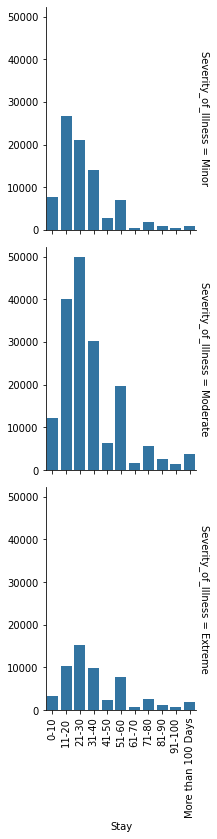

In [26]:
g = sb.FacetGrid(data = df2, row = 'Severity_of_Illness', size = 3.5,
                margin_titles = True)
g.map(sb.countplot, 'Stay')
plt.xticks(rotation = 90)


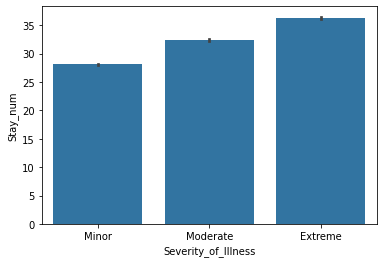

In [27]:
sb.barplot(data = df2,y = 'Stay_num', x = 'Severity_of_Illness', color = base_color)

as going from minor to extreme the average num of stay increse(as expected) 
the destribution at every level of sevirity of illness is nearly the same 

Figuring out the relation between Type_of_Admission and stay

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

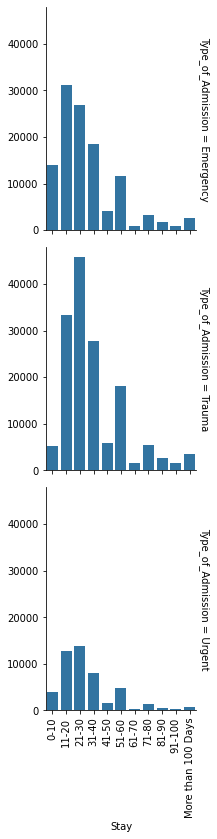

In [28]:
g = sb.FacetGrid(data = df2, row = 'Type_of_Admission', size = 3.5,
                margin_titles = True)
g.map(sb.countplot, 'Stay')
plt.xticks(rotation = 90)


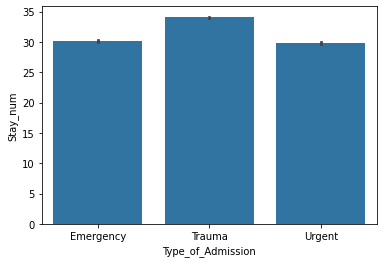

In [29]:
sb.barplot(data = df2,y = 'Stay_num', x = 'Type_of_Admission', color = base_color)

trauma Type of admission get the most average stay.
the distribution for each admission is nearly the same

figuring the relation between Department and stay

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

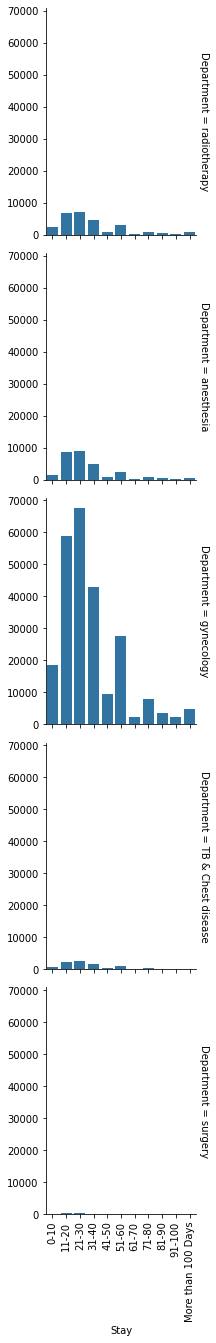

In [30]:
g = sb.FacetGrid(data = df2, row = 'Department', size = 3.5,
                margin_titles = True)
g.map(sb.countplot, 'Stay')
plt.xticks(rotation = 90)


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

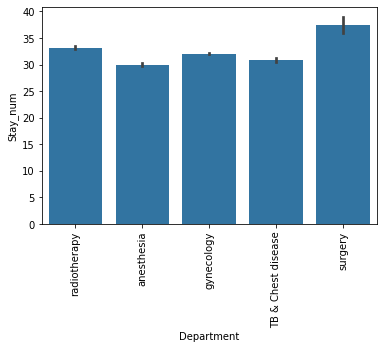

In [31]:
sb.barplot(data = df2,y = 'Stay_num', x = 'Department', color = base_color)
plt.xticks(rotation = 90)

Surgery have the most average stay, not all department have same number of casses in the data set but the department that have sufficeint data set have the same distribution

the relation between stay and Hospital_region_code

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

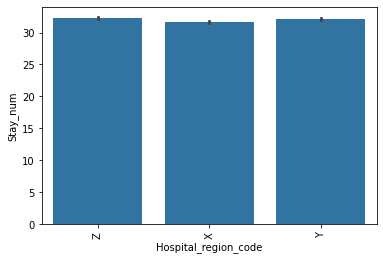

In [32]:
sb.barplot(data = df2,y = 'Stay_num', x = 'Hospital_region_code', color = base_color)
plt.xticks(rotation = 90)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

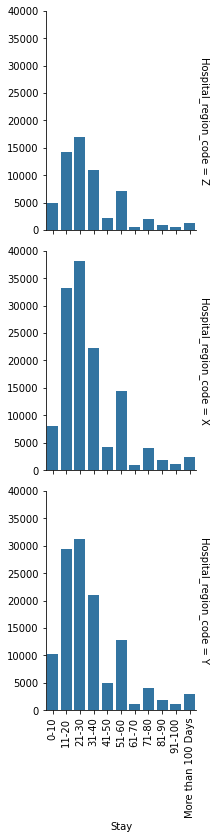

In [33]:
g = sb.FacetGrid(data = df2, row = 'Hospital_region_code', size = 3.5,
                margin_titles = True)
g.map(sb.countplot, 'Stay')
plt.xticks(rotation = 90)


the average number and the disribution are the same

For Ward_type

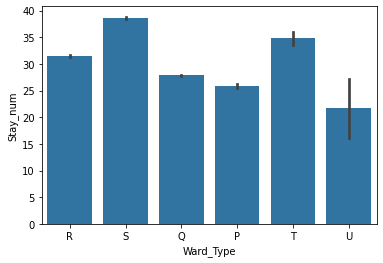

In [34]:
sb.barplot(data = df2,y = 'Stay_num', x = 'Ward_Type', color = base_color)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

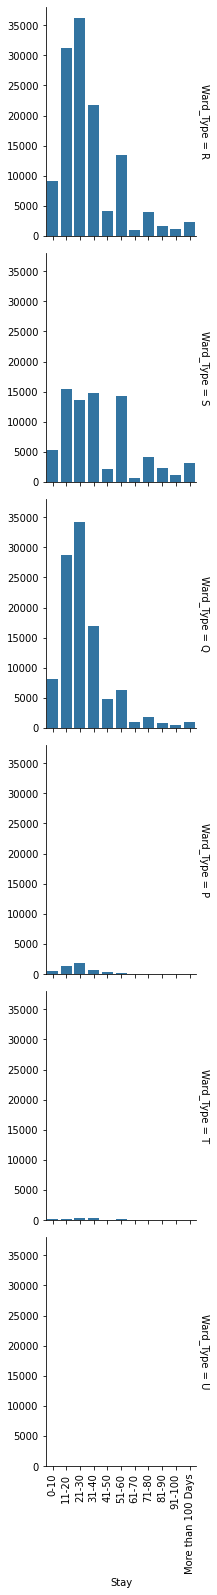

In [35]:
g = sb.FacetGrid(data = df2, row = 'Ward_Type', size = 3.5,
                margin_titles = True)
g.map(sb.countplot, 'Stay')
plt.xticks(rotation = 90)


ward_types P, T and U exist rarly in the data set so after execluding them type S then R have the highst average stay

figuring out other relations

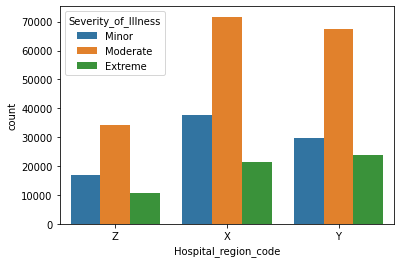

In [36]:
sb.countplot(data = df2, hue = 'Severity_of_Illness', x = 'Hospital_region_code')

the distributions are the same

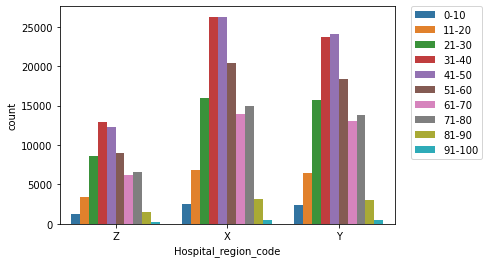

In [37]:
sb.countplot(data = df2, hue = 'Age', x = 'Hospital_region_code')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

the distributions are nearly the same

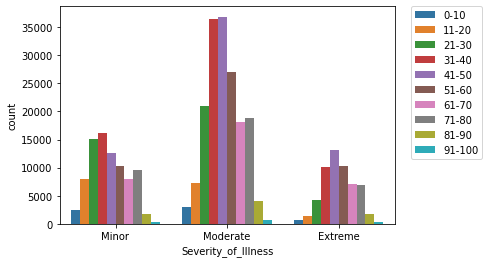

In [38]:
sb.countplot(data = df2, hue = 'Age', x = 'Severity_of_Illness')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

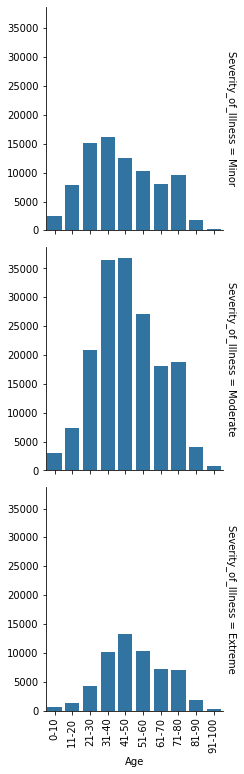

In [39]:
g = sb.FacetGrid(data = df2, row = 'Severity_of_Illness', size = 3.5,
                margin_titles = True)
g.map(sb.countplot, 'Age')
plt.xticks(rotation = 90)


at the minor severity of illness the ages tends to be lest while as you go to extreme the age tend to be more

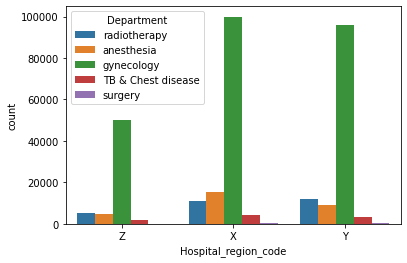

In [40]:
sb.countplot(data = df2, hue = 'Department', x = 'Hospital_region_code')
# plt.legend([],[], frameon=False)

the distributions are nearly the same 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 
*  the relation between Age and Stay is like 2d Gausian distribution, the beak is at age[30-50] and stay[10-30] and it decrease as you get away from it

*   for sevirity_of_illness: as going from minor to extreme the average num of stay increse(as expected) 
the destribution at every level of sevirity of illness is nearly the same 
*  trauma Type of admission get the most average stay.
the distribution for each admission is nearly the same
*  for department: Surgery have the most average stay, not all department have same number of casses in the data set but the department that have sufficeint data set have the same distribution, surgery occured less than other departments but assuming that its data are correct this result is correct as we are taking the average

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> 

*   at the minor severity of illness the ages tends to be lest while as you go to extreme the age tend to be more



## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

some of the following cells show the counts, to make me see if some parts have sufficient amount of data or not

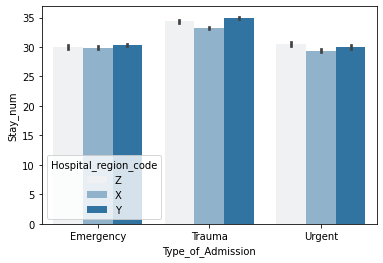

In [41]:
sb.barplot(data = df2,y = 'Stay_num', x = 'Type_of_Admission',hue='Hospital_region_code', color = base_color)

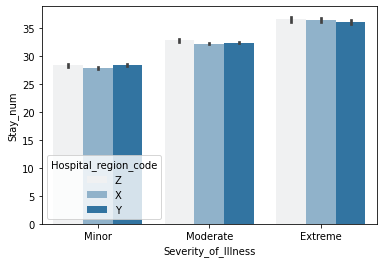

In [43]:
sb.barplot(data = df2,y = 'Stay_num', x = 'Severity_of_Illness',hue='Hospital_region_code', color = base_color)

no new results

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

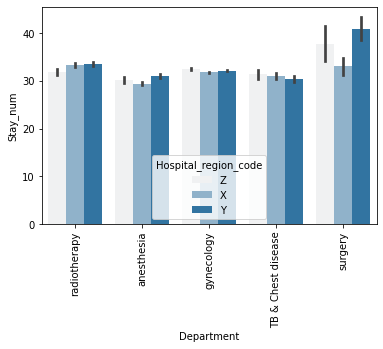

In [45]:
sb.barplot(data = df2,y = 'Stay_num', x = 'Department',hue='Hospital_region_code', color = base_color)
plt.xticks(rotation=90)

at region X the surgery department has lower average stay compared to other department in the other regions as in the other regions the departments have similar average stay days.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


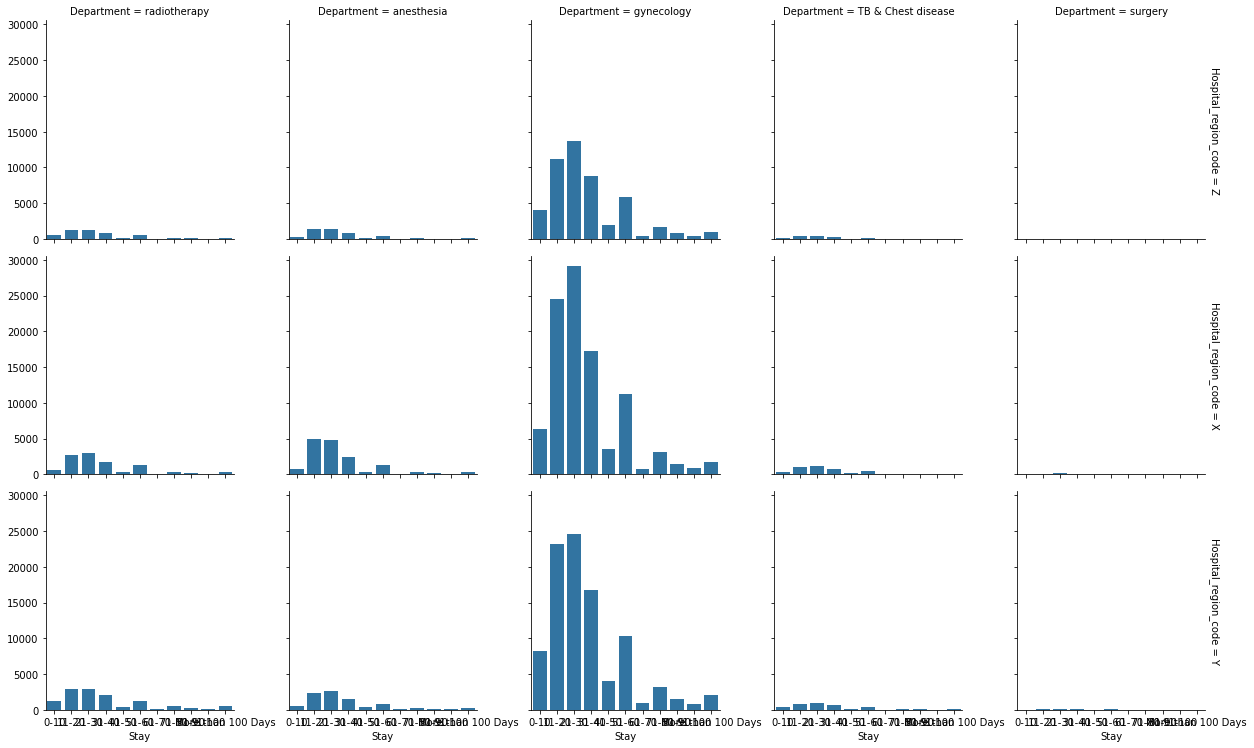

In [46]:
g = sb.FacetGrid(data = df2, col = 'Department', row = 'Hospital_region_code', size = 3.5,
                margin_titles = True)
g.map(sb.countplot, 'Stay')

at region X the surgery department has lower average stay compared to other department in the other regions as in the other regions the departments have similar average stay days, it has no data 

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

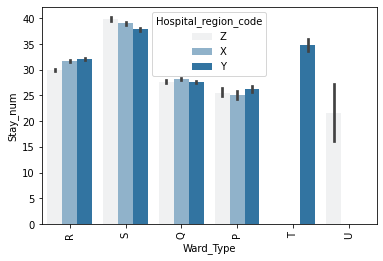

In [47]:
sb.barplot(data = df2,y = 'Stay_num', x = 'Ward_Type',hue='Hospital_region_code', color = base_color)
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


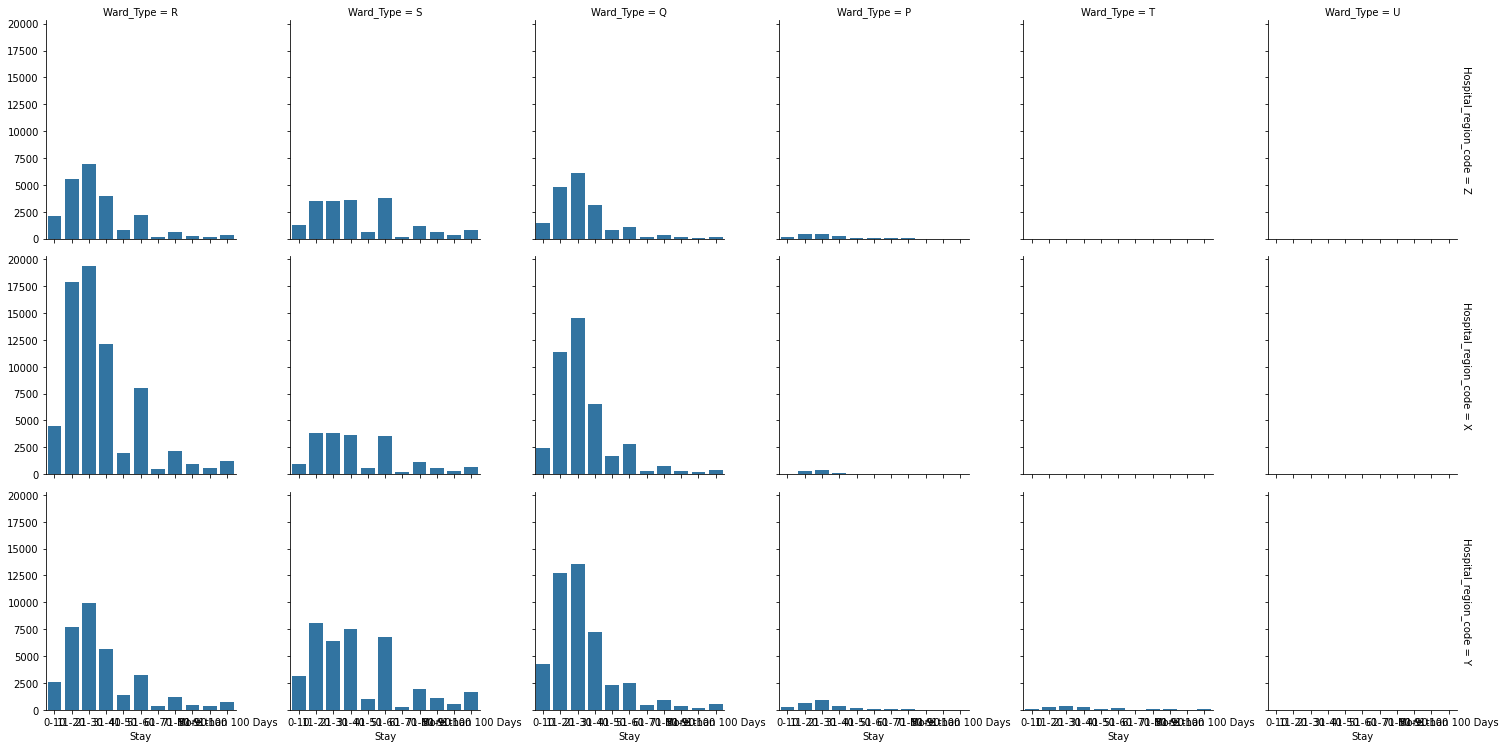

In [48]:
g = sb.FacetGrid(data = df2, col = 'Ward_Type', row = 'Hospital_region_code', size = 3.5,
                margin_titles = True)
g.map(sb.countplot, 'Stay')

region X don't have U and V ward_type,
region z don't have U,
and region z don't have T.
but this is trivial as P T and Q hardly exist in the data set

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

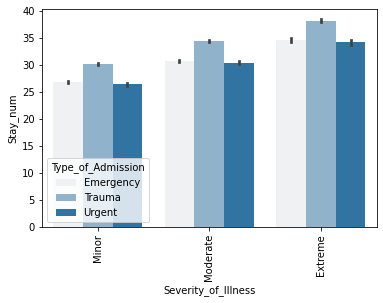

In [49]:
sb.barplot(data = df2,y = 'Stay_num', x = 'Severity_of_Illness',hue='Type_of_Admission', color = base_color)
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


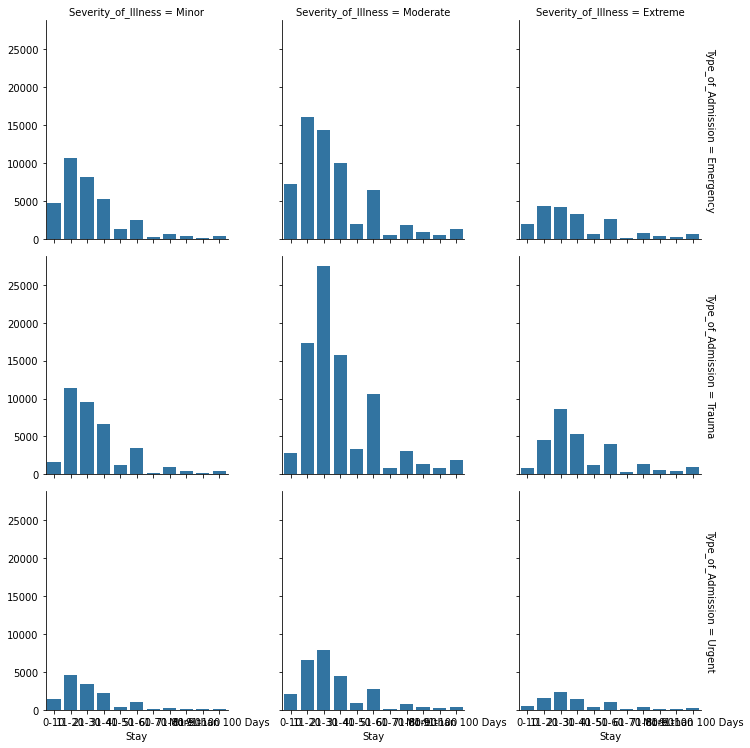

In [50]:
g = sb.FacetGrid(data = df2, col = 'Severity_of_Illness', row = 'Type_of_Admission', size = 3.5,
                margin_titles = True)
g.map(sb.countplot, 'Stay')

In [51]:
df3 = df2[(df2.Ward_Type != 'P') & (df2.Ward_Type != 'T') & (df2.Ward_Type != 'U')]

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

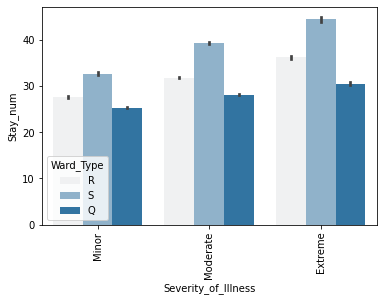

In [52]:
sb.barplot(data = df3,y = 'Stay_num', x = 'Severity_of_Illness',hue='Ward_Type', color = base_color)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

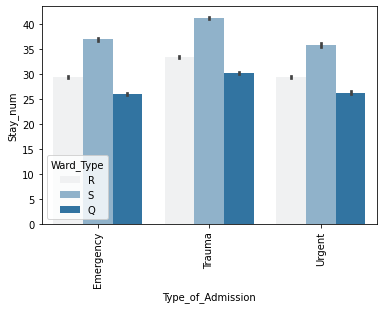

In [53]:
sb.barplot(data = df3,y = 'Stay_num', x = 'Type_of_Admission',hue='Ward_Type', color = base_color)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

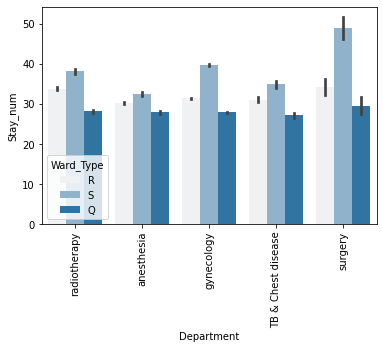

In [54]:
sb.barplot(data = df3,y = 'Stay_num', x = 'Department',hue='Ward_Type', color = base_color)
plt.xticks(rotation=90)

surgery department that are S ward_type tend to have more average stay than in the other departments

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


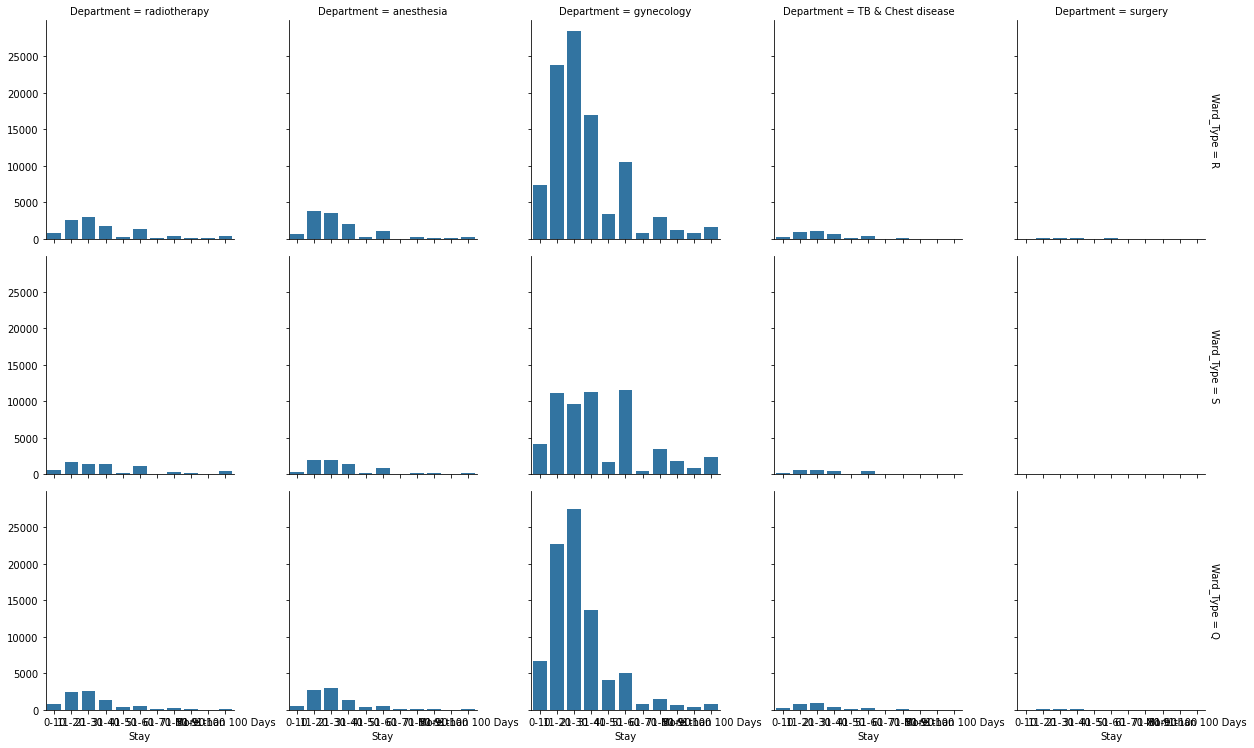

In [72]:
g = sb.FacetGrid(data = df3, col = 'Department', row = 'Ward_Type', size = 3.5,
                margin_titles = True)
g.map(sb.countplot, 'Stay')

surgery department that are S ward_type tend to have more average stay, but it has no data :) so this result isn't accurate

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

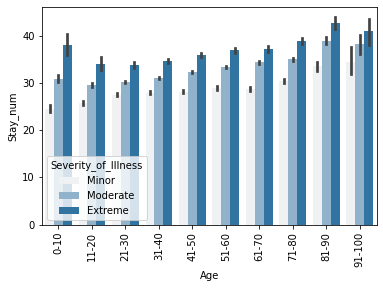

In [56]:
sb.barplot(data = df3,y = 'Stay_num', x = 'Age',hue='Severity_of_Illness', color = base_color)
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


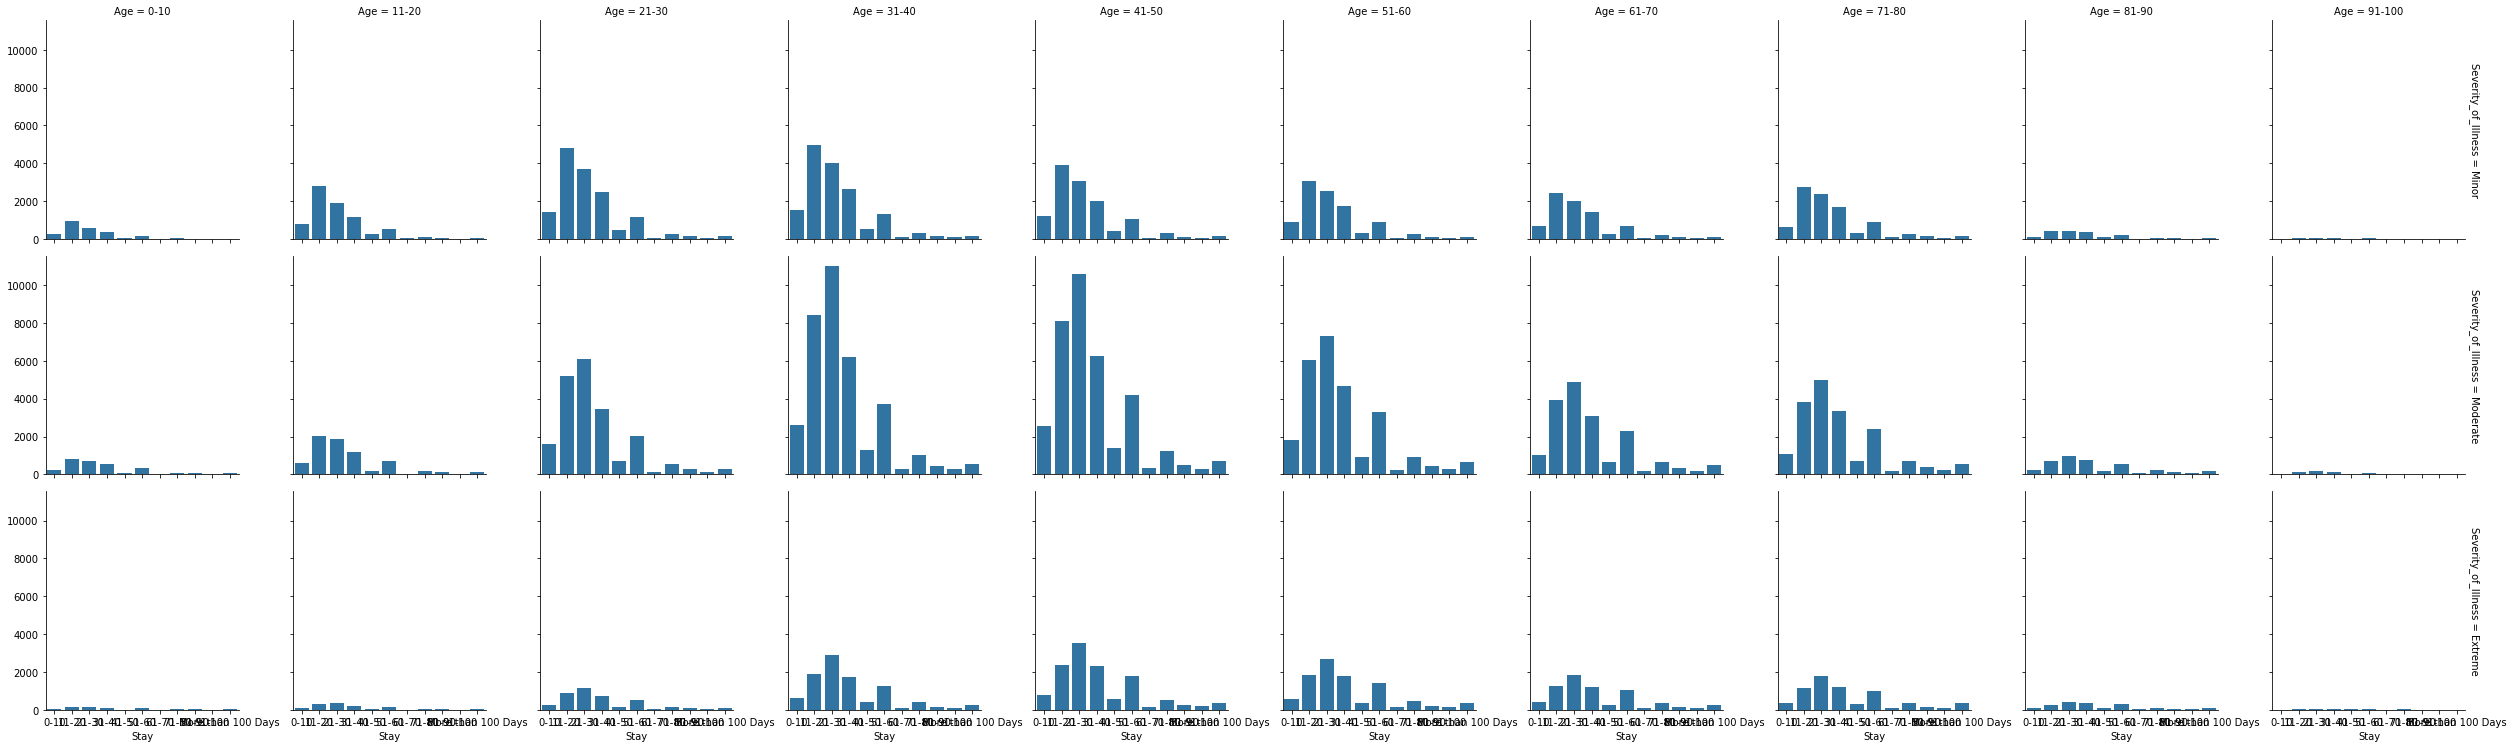

In [57]:
g = sb.FacetGrid(data = df3, col = 'Age', row = 'Severity_of_Illness', size = 3.5,
                margin_titles = True)
g.map(sb.countplot, 'Stay')

the average stay in age range[0-10] that are exetreme severity of illness are larger than they are in the other age ranges, but the data are small but assuming the data are correct not happend by accident or outlier as we are taking the average this result may be true

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

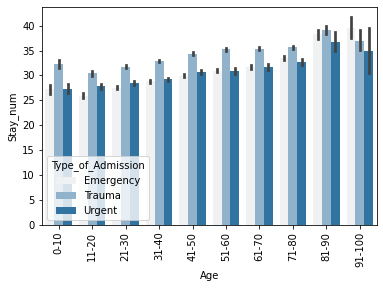

In [58]:
sb.barplot(data = df3,y = 'Stay_num', x = 'Age',hue='Type_of_Admission', color = base_color)
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


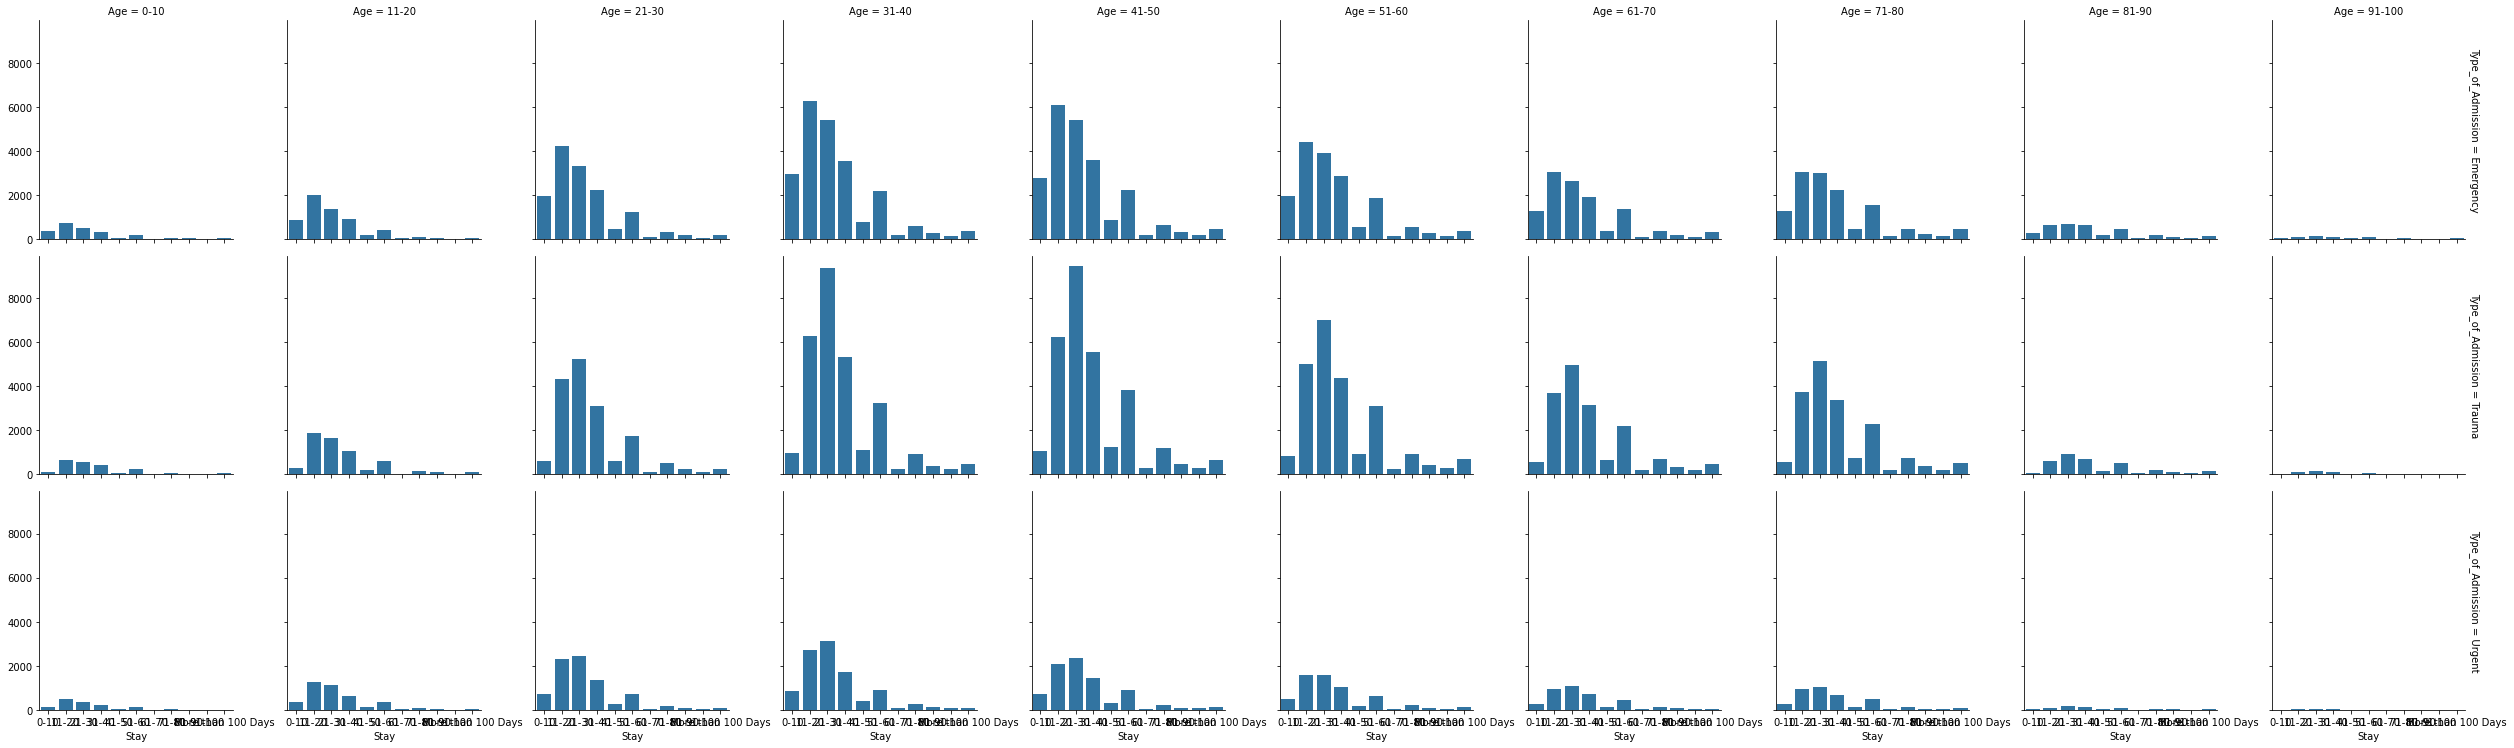

In [59]:
g = sb.FacetGrid(data = df3, col = 'Age', row = 'Type_of_Admission', size = 3.5,
                margin_titles = True)
g.map(sb.countplot, 'Stay')

Trauma type of admission tend to have higher average stay compared to the other type of admissions in age range[0-10] compared to the other age ranges

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

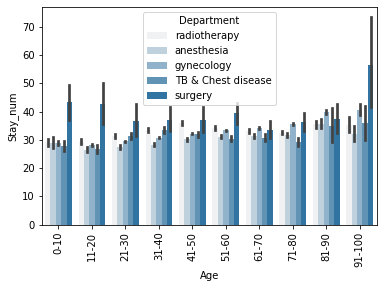

In [60]:
sb.barplot(data = df3,y = 'Stay_num', x = 'Age',hue='Department', color = base_color)
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


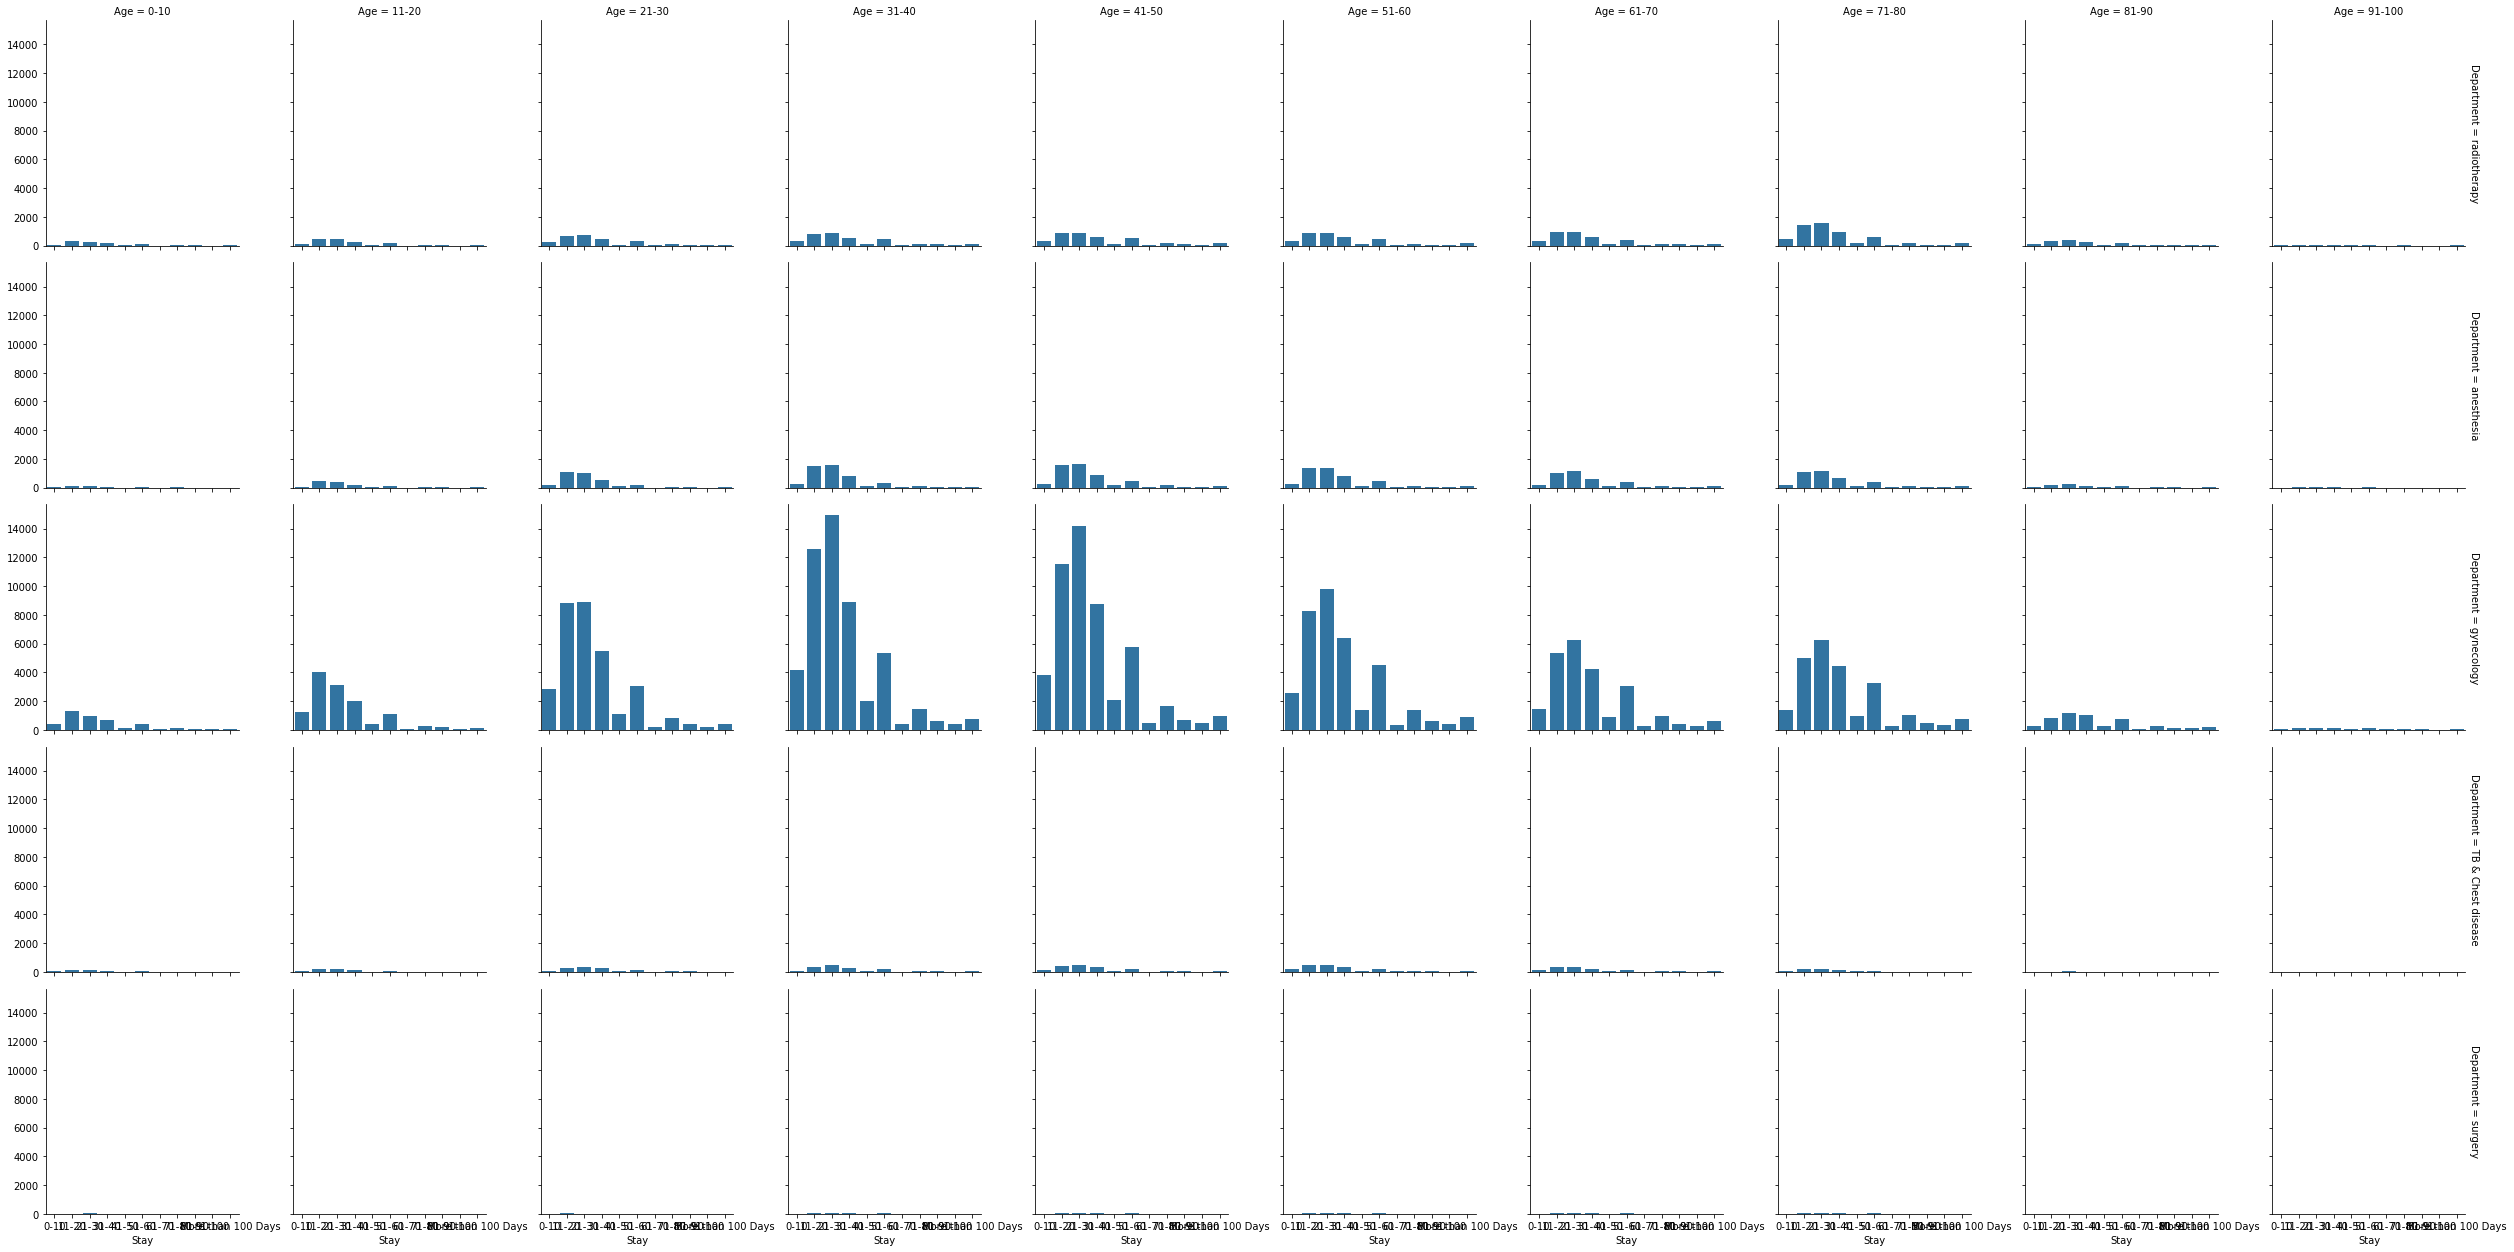

In [61]:
g = sb.FacetGrid(data = df3, col = 'Age', row = 'Department', size = 3.5,
                margin_titles = True)
g.map(sb.countplot, 'Stay')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

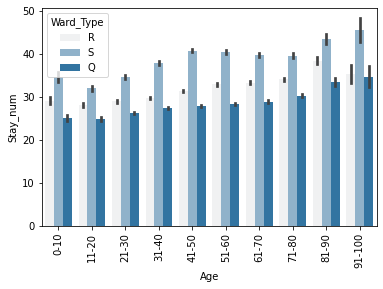

In [62]:
sb.barplot(data = df3,y = 'Stay_num', x = 'Age',hue='Ward_Type', color = base_color)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

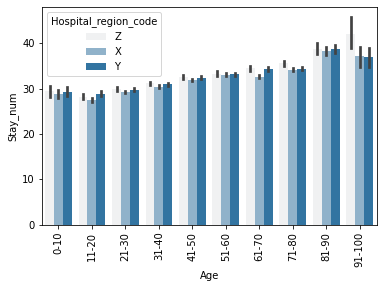

In [63]:
sb.barplot(data = df3,y = 'Stay_num', x = 'Age',hue='Hospital_region_code', color = base_color)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

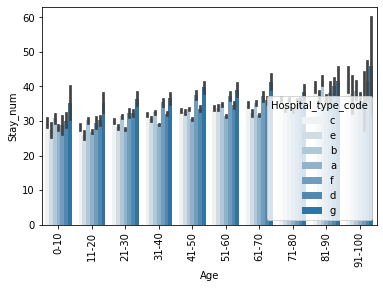

In [64]:
sb.barplot(data = df3,y = 'Stay_num', x = 'Age',hue='Hospital_type_code', color = base_color)
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


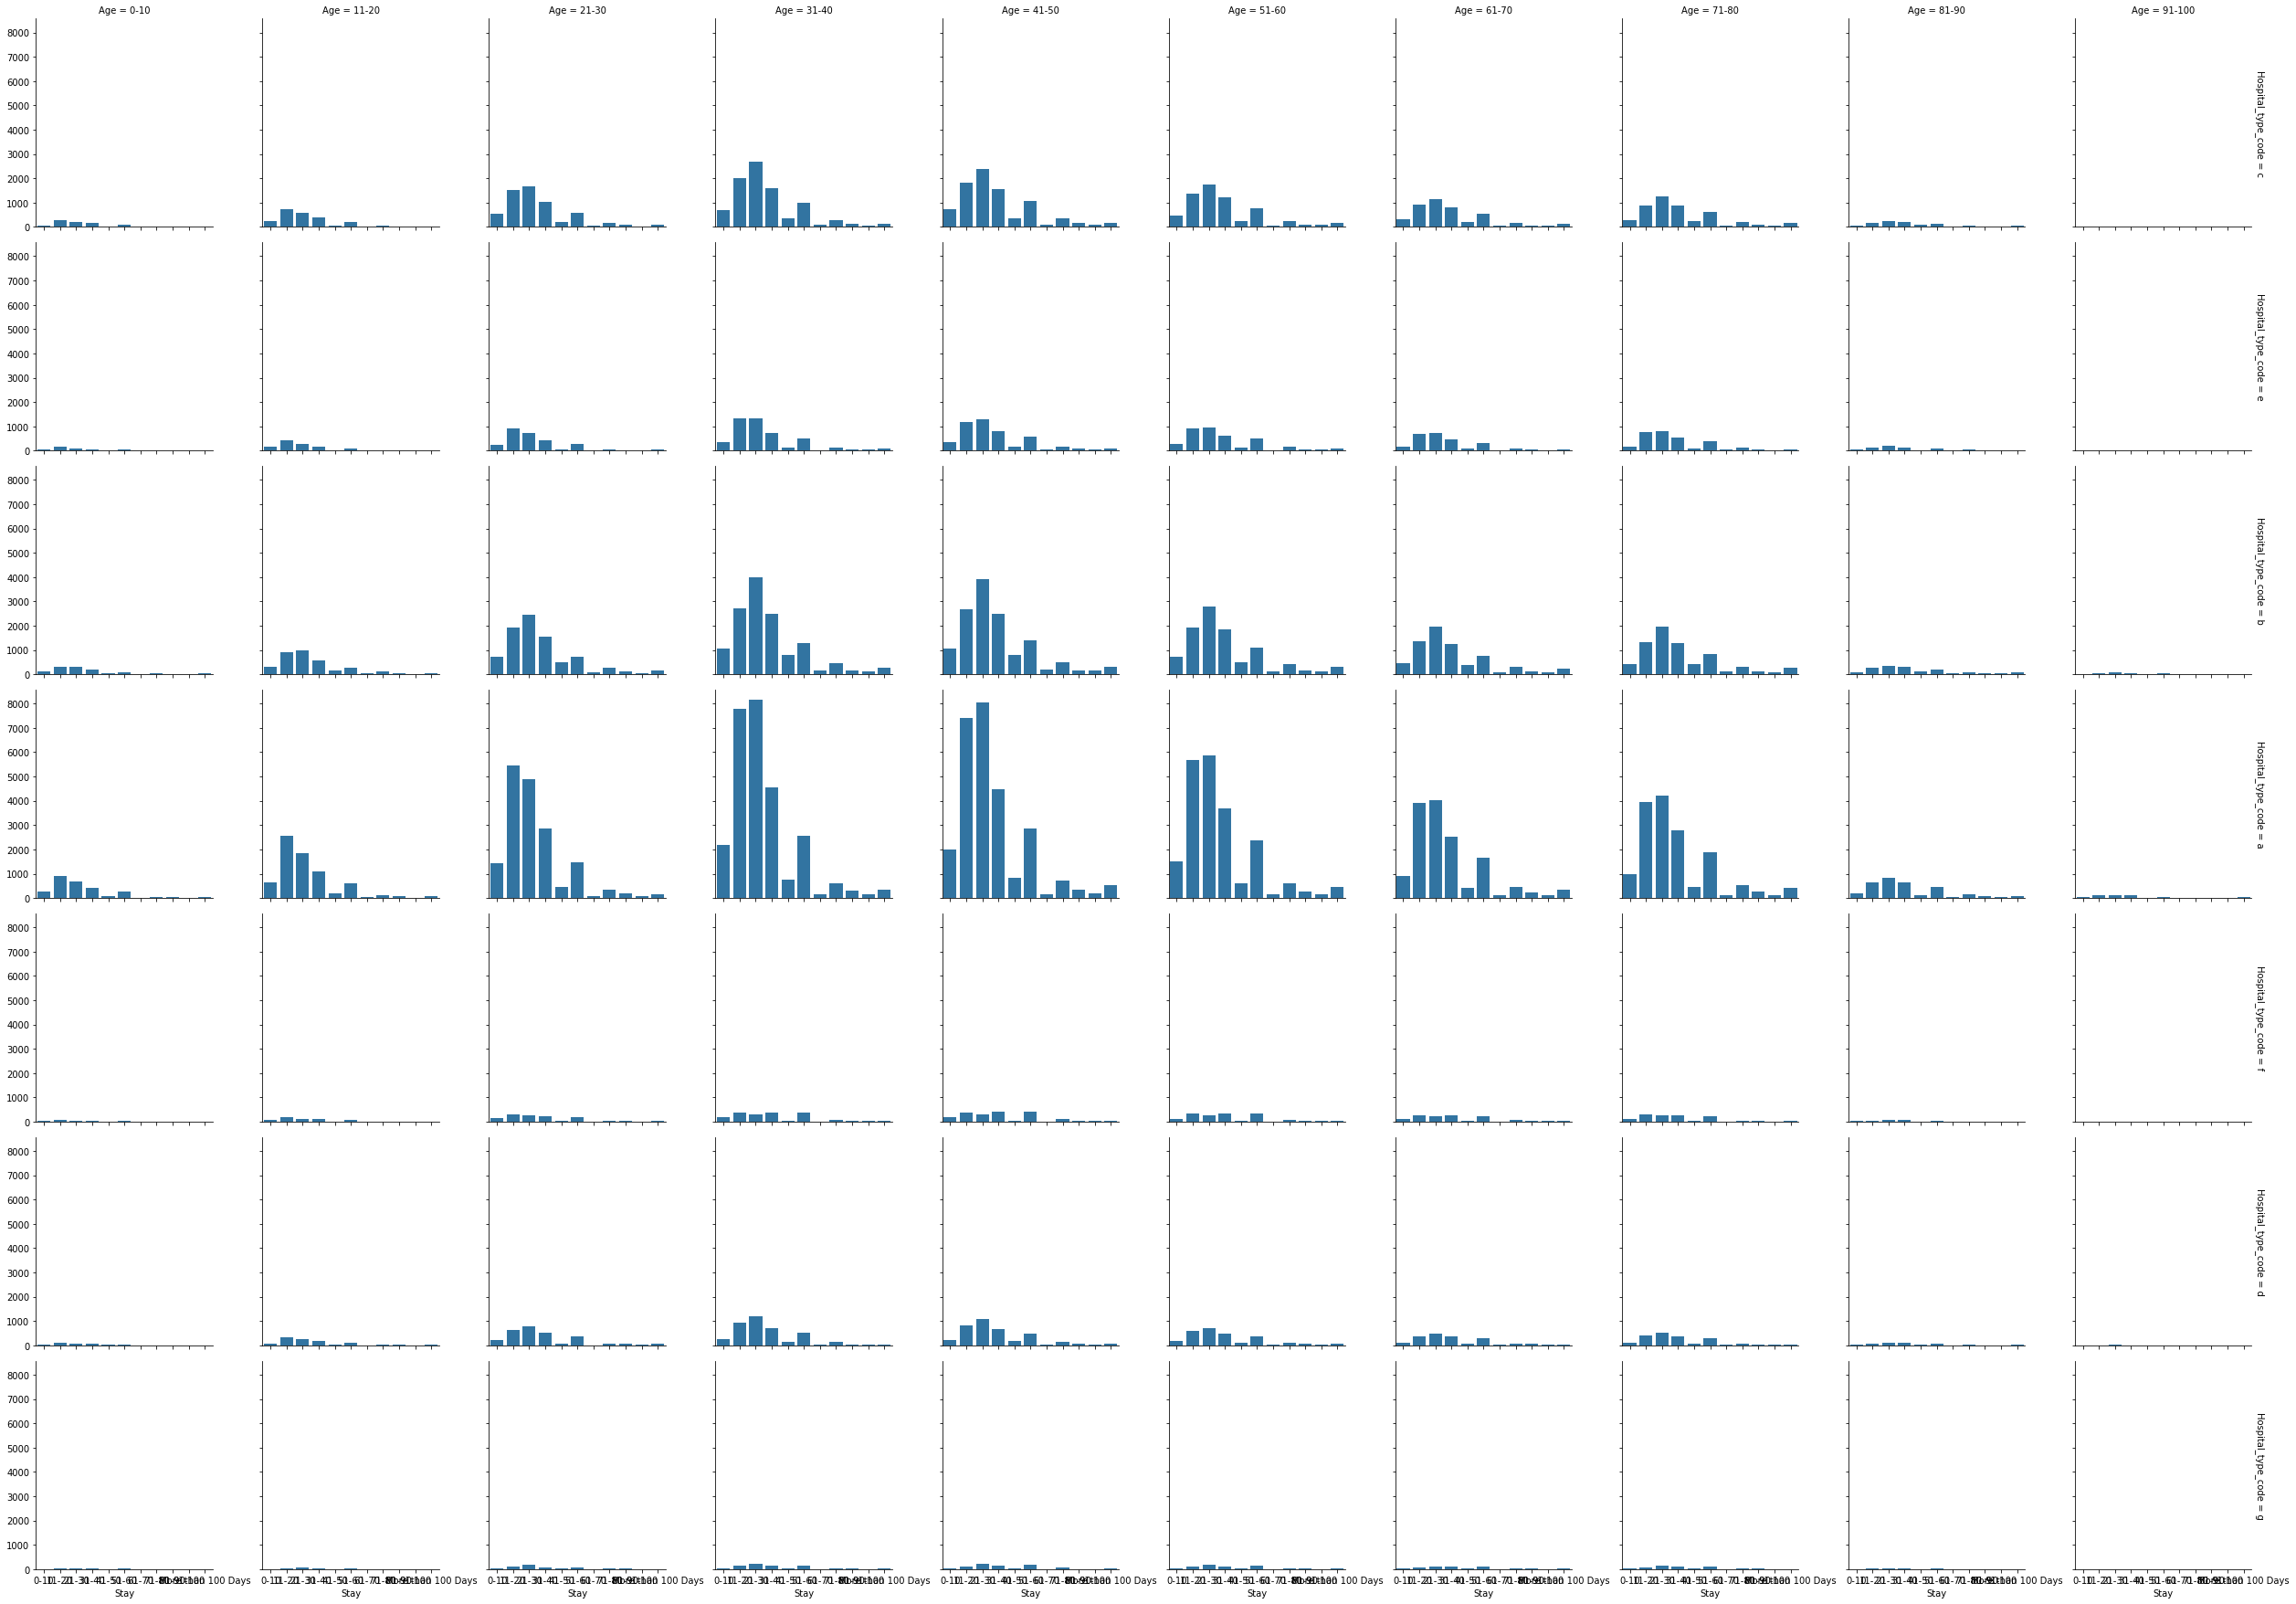

In [65]:
g = sb.FacetGrid(data = df3, col = 'Age', row = 'Hospital_type_code', size = 3.5,
                margin_titles = True)
g.map(sb.countplot, 'Stay')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

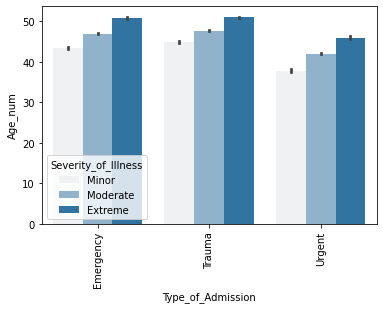

In [66]:
sb.barplot(data = df3,y = 'Age_num', x = 'Type_of_Admission',hue='Severity_of_Illness', color = base_color)
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


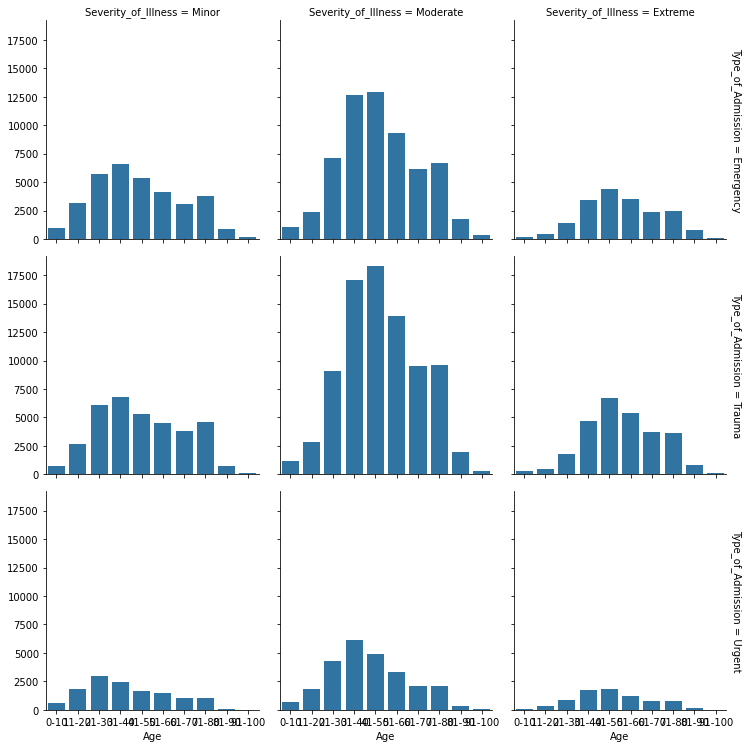

In [67]:
g = sb.FacetGrid(data = df3, col = 'Severity_of_Illness', row = 'Type_of_Admission', size = 3.5,
                margin_titles = True)
g.map(sb.countplot, 'Age')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

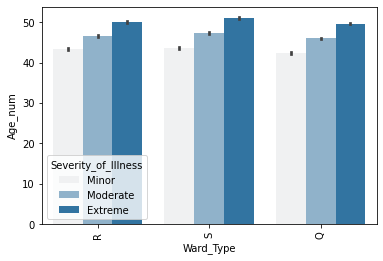

In [68]:
sb.barplot(data = df3,y = 'Age_num', x = 'Ward_Type',hue='Severity_of_Illness', color = base_color)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

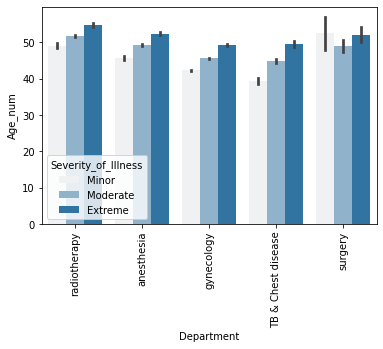

In [69]:
sb.barplot(data = df3,y = 'Age_num', x = 'Department',hue='Severity_of_Illness', color = base_color)
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


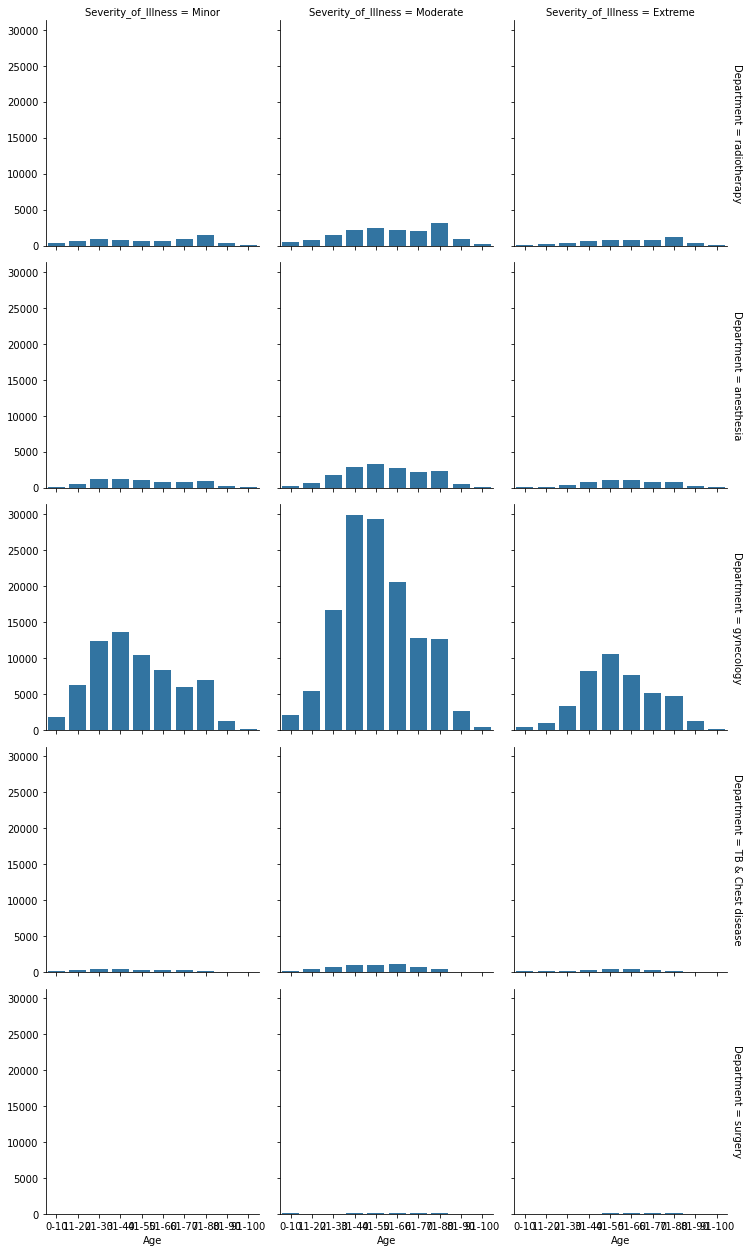

In [70]:
g = sb.FacetGrid(data = df3, col = 'Severity_of_Illness', row = 'Department', size = 3.5,
                margin_titles = True)
g.map(sb.countplot, 'Age')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 

*   the average stay in age range[0-10] that are exetreme severity of illness are larger than they are in the other age ranges, but the data are small but assuming the data are correct (not happend by accident or outlier) as we are taking the average this result may be true

*   Trauma type of admission tend to have higher average stay compared to the other type of admissions in age range[0-10] compared to the other age ranges






### Were there any interesting or surprising interactions between features?

> No, some times the data are so small in some categories so that it's hard to say there is relations ande interactions